# Test Model

In [7]:
class_label = ['Nangka ',
              'JantungPisang ',
              'Apel ',
              'Melon ',
              'Sawo ',
              'Durian ',
              'bayamMerah ',
              'Alpukat ',
              'Salak ',
              'Belimbing ',
              'Buah Naga ',
              'Kol Putih ',
              'Duku ',
              'Sawi Putih ',
              'jengkol ',
              'DaunMelinjo ',
              'DaunParsley ',
              'Kelengkeng ',
              'Daun Kucai ',
              'Nangka Muda ',
              'Kacang Panjang ',
              'Nanas ',
              'Pakis ',
              'Daun Talas ',
              'Terong Belanda ',
              'petai ',
              'Sirsak ',
              'Daun Pepaya ',
              'Rebung ',
              'Kacang Mekah ',
              'Tomat Merah ',
              'Jamur Tiram ',
              'RumputLaut ',
              'Timun ',
              'Semangka ',
              'Daun Seledri ',
              'Jeruk ',
              'Kangkung ',
              'Markisa ',
              'Mangga ',
              'Kol Merah ',
              'Srikaya ',
              'Jamur Kuping ',
              'Selada Air ',
              'Lemon ',
              'Kelapa ',
              'Taoge ',
              'LabuSiam ',
              'Bayam Hijau ',
              'Tomat Muda ',
              'Jeruk Nipis ',
              'Sukun ',
              'Terong ',
              'Kecombrang ',
              'PepayaMuda ',
              'JagungMuda ',
              'Genjer ',
              'Kecipir ',
              'Rambutan ',
              'DaunKubis ',
              'Manggis ',
              'Kesemek ',
              'Matoa ',
              'Jeruk Bali ',
              'Pala ',
              'Buncis ',
              'Jambu Air ',
              'Pepaya ',
              'Mengkudu ',
              'Jambu Biji ',
              'Selada ',
              'Labu Waluh Kuning ',
              'Sawi Hijau ',
              'Melinjo ',
              'Pisang ',
              'Kedondong ',
              'Anggur ',
              'Wortel']

In [2]:
import tensorflow as tf
import numpy as np
from PIL import Image
from IPython.display import clear_output as cls

In [3]:
# get the model
tflite_model_path = '/content/drive/MyDrive/Capstone/model_fix/MobNetV3L96[0-255].tflite'

# load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

# get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


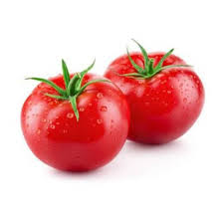

In [4]:
image_path = '/content/drive/MyDrive/Capstone/pepaya.jpg'
image_path = '/content/drive/MyDrive/Capstone/tomat.jfif'

# load image
img = Image.open(image_path)

# resize image to (224, 224)
img = img.resize((224, 224))

# convert image to numpy array
img_array = np.array(img)

# expand dims to match the model's input shape (1, 224, 224, 3)
img_array = np.expand_dims(img_array, axis=0)

# cast type
img_array = img_array.astype('float32')
img

In [8]:
# set the value of the input tensor
interpreter.set_tensor(input_details[0]['index'], img_array)

# run the model
interpreter.invoke()

# get the results
output_data = interpreter.get_tensor(output_details[0]['index'])
print("Model Output:", class_label[np.argmax(output_data, axis=1)[0]])


Model Output: Tomat Merah 


# Add Metadata

In [6]:
!pip uninstall tflite-support -y
!pip install tflite-support
!pip install tensorflow==2.11.0  # atau versi yang sesuai dengan tflite_support
!pip install tflite-support
cls()

In [9]:
import tensorflow
print(tensorflow.__version__)

2.11.0


In [10]:
from tflite_support.metadata_writers import image_classifier
from tflite_support.metadata_writers import writer_utils

In [12]:
ImageClassifierWriter = image_classifier.MetadataWriter
_MODEL_PATH = "/content/MobNetV3L96[0-255].tflite"
_LABEL_FILE = "/content/label_fix.txt"
_SAVE_TO_PATH = "/content/drive/MyDrive/Capstone/MobNetV3L96_MetaData[0-255].tflite"
# for normalization and quantization parameters below for more details
# https://www.tensorflow.org/lite/models/convert/metadata#normalization_and_quantization_parameters)
_INPUT_NORM_MEAN = 0.0
_INPUT_NORM_STD = 1.0

# Create the metadata writer.
writer = ImageClassifierWriter.create_for_inference(
    writer_utils.load_file(_MODEL_PATH), [_INPUT_NORM_MEAN], [_INPUT_NORM_STD],
    [_LABEL_FILE])

# Verify the metadata generated by metadata writer.
print(writer.get_metadata_json())

# Populate the metadata into the model.
writer_utils.save_file(writer.populate(), _SAVE_TO_PATH)

{
  "name": "ImageClassifier",
  "description": "Identify the most prominent object in the image from a known set of categories.",
  "subgraph_metadata": [
    {
      "input_tensor_metadata": [
        {
          "name": "image",
          "description": "Input image to be classified.",
          "content": {
            "content_properties_type": "ImageProperties",
            "content_properties": {
              "color_space": "RGB"
            }
          },
          "process_units": [
            {
              "options_type": "NormalizationOptions",
              "options": {
                "mean": [
                  0.0
                ],
                "std": [
                  1.0
                ]
              }
            }
          ],
          "stats": {
            "max": [
              255.0
            ],
            "min": [
              0.0
            ]
          }
        }
      ],
      "output_tensor_metadata": [
        {
          "name": "probabil